In [29]:
import pandas as pd


In [30]:
df = pd.read_csv('iris.csv')

df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [31]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

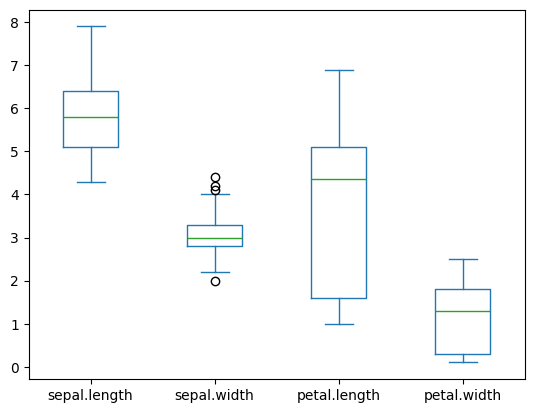

In [32]:
df.plot.box()

<Axes: xlabel='sepal.length', ylabel='sepal.width'>

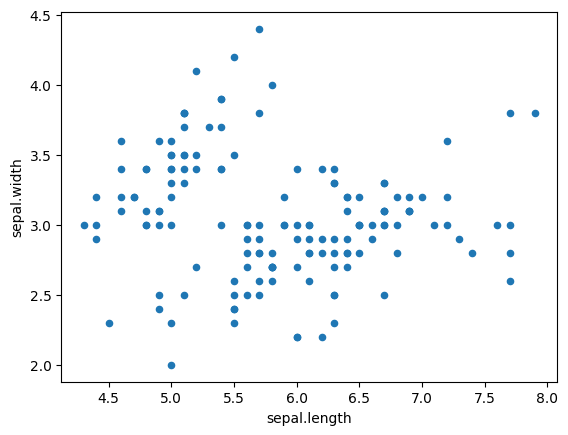

In [33]:
df.plot.scatter(x='sepal.length', y='sepal.width')

<Axes: xlabel='petal.length', ylabel='petal.width'>

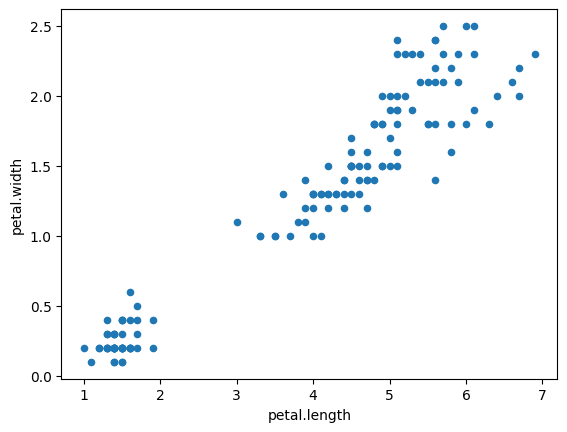

In [34]:
df.plot.scatter(x='petal.length', y='petal.width')

In [40]:
#split data
from sklearn.model_selection import train_test_split

x = df.drop('variety', axis = 1)
y = df['variety']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state = 42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(75, 4)
(75, 4)
(75,)
(75,)


In [41]:
y_test.value_counts()

variety
Setosa        29
Versicolor    23
Virginica     23
Name: count, dtype: int64

In [53]:
# gunakan pipe line dimana preproccsing standard scalle lalu modeling

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='sag'))
])

pipe.fit(x_train, y_train)

scores = cross_val_score(pipe, x, y, cv=5)
print(scores.mean(), scores.std)


0.9600000000000002 <built-in method std of numpy.ndarray object at 0x00000259DFCCEF10>


In [45]:
# cel classigication report dengan data test

from sklearn.metrics import classification_report

y_pred = pipe.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        29
  Versicolor       0.96      1.00      0.98        23
   Virginica       1.00      0.96      0.98        23

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



In [46]:
# cek di data training

y_pred_train = pipe.predict(x_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        21
  Versicolor       0.92      0.89      0.91        27
   Virginica       0.89      0.93      0.91        27

    accuracy                           0.93        75
   macro avg       0.94      0.94      0.94        75
weighted avg       0.93      0.93      0.93        75



In [47]:
# Pendekatan lain 
# use k fold cross validation dimana k lebih kecil yaitu 5

from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipe, x, y, cv = 10)
print(scores)

[1.         0.93333333 1.         1.         0.93333333 0.93333333
 0.8        1.         1.         1.        ]


In [48]:
scores.mean()

np.float64(0.9600000000000002)

In [49]:
scores.std()

np.float64(0.06110100926607785)

In [50]:
#apply grid search to fine tune hyperparameter of the mode in pipeline

from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets

iris = datasets.load_iris()
parameters = {'max_iter':range(100,500,100), 'solver': ['lbfgs','sag']}
logistic = LogisticRegression()
clf = GridSearchCV(logistic, parameters)
clf.fit(iris.data, iris.target)
sorted(clf.cv_results_.keys())

c:\Users\natan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\natan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\natan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\natan\AppData\Local\Programs\Py

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_iter',
 'param_solver',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [51]:
clf

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'max_iter': range(100, 500, 100),
                         'solver': ['lbfgs', 'sag']})